In [1]:
!pip install sklearn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import modules from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


#Loading the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

In [3]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,accep
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
# Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

In [5]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,accep
0,vhigh,vhigh,2,2,small,low,False
1,vhigh,vhigh,2,2,small,med,False
2,vhigh,vhigh,2,2,small,high,False
3,vhigh,vhigh,2,2,med,low,False
4,vhigh,vhigh,2,2,med,med,False


In [7]:
X.columns

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')

In [8]:
len(X.columns)

21

In [9]:
x_train, x_test,  y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [11]:
dt = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.01, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

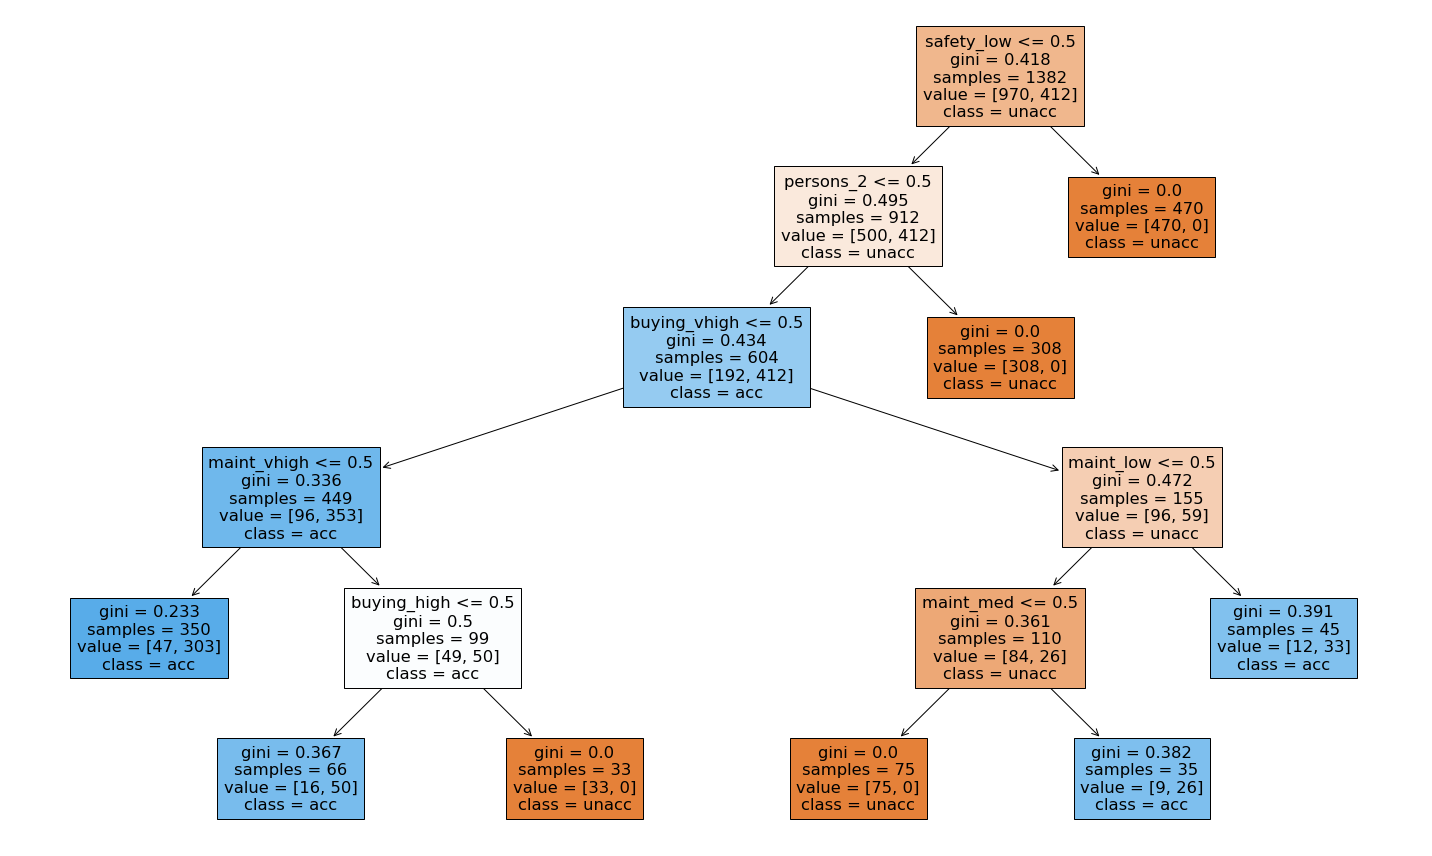

In [12]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names= x_train.columns, max_depth=5, class_names=['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [14]:
print(tree.export_text(dt, feature_names = x_train.columns.tolist()))

|--- safety_low <= 0.50
|   |--- persons_2 <= 0.50
|   |   |--- buying_vhigh <= 0.50
|   |   |   |--- maint_vhigh <= 0.50
|   |   |   |   |--- class: True
|   |   |   |--- maint_vhigh >  0.50
|   |   |   |   |--- buying_high <= 0.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- buying_high >  0.50
|   |   |   |   |   |--- class: False
|   |   |--- buying_vhigh >  0.50
|   |   |   |--- maint_low <= 0.50
|   |   |   |   |--- maint_med <= 0.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- maint_med >  0.50
|   |   |   |   |   |--- class: True
|   |   |   |--- maint_low >  0.50
|   |   |   |   |--- class: True
|   |--- persons_2 >  0.50
|   |   |--- class: False
|--- safety_low >  0.50
|   |--- class: False

